

# Accidentalidad en Barranquilla

Informacion sobre los accidentes de transito ocurridos en el distrito de barranquilla segun informes policiales de accidentes de transito.



## Preguntas
1. Describa la variable clase_accidente grafique y ver que conclusiones encuentra.
2. ¿Cual es el promedio anual de accidentes de transito en Barranquilla?
3. Graficar la cantidad de heridos por accidente y muertos por accidente
4. Graficar la gravedad de los accidentes

## Preprocesamiento y exploracion de los datos
Limpieza de datos, manejo de valores faltantes y normalizacion/escalado.

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_excel("/content/Accidentalidad_en_Barranquilla_2024.xlsx")

In [111]:
df

,FECHA_ACCIDENTE,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES
0,2018-01-01T00:00:00.000,2018,January,Mon,01:30:00:am,Con heridos,Atropello,CL 87 9H 24,1.0,NaN,1
1,2018-01-01T00:00:00.000,2018,January,Mon,02:00:00:pm,Solo daños,Choque,CL 110 CR 46,NaN,NaN,1
2,2018-01-01T00:00:00.000,2018,January,Mon,04:00:00:am,Solo daños,Choque,AV CIRCUNVALAR CR 9G,NaN,NaN,1
3,2018-01-01T00:00:00.000,2018,January,Mon,04:30:00:am,Solo daños,Choque,CLLE 72 CRA 29,NaN,NaN,1
4,2018-01-01T00:00:00.000,2018,January,Mon,05:20:00:pm,Solo daños,Choque,VIA 40 CALLE 75,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
24864,2023-12-29T00:00:00.000,2023,December,Fri,04:00:00:pm,Con heridos,Choque,CARRERA 6D CALLE 18,1.0,NaN,1
24865,2023-12-29T00:00:00.000,2023,December,Fri,07:35:00:pm,Con heridos,Choque,AVENIDA CIRCUNVALAR CRA 25,1.0,NaN,1
24866,2023-12-29T00:00:00.000,2023,December,Fri,08:30:00:am,Con heridos,Choque,AV CIRCUNVALAR CON CARRERA 43,2.0,NaN,1
24867,2023-12-30T00:00:00.000,2023,December,Sat,04:25:00:pm,Con muertos,Choque,CARRERA 46 CALLE 37,2.0,1.0,1


In [112]:
df.shape

(24869, 11)

In [113]:
df.columns

Index(['FECHA_ACCIDENTE', 'AÑO_ACCIDENTE', 'MES_ACCIDENTE', 'DIA_ACCIDENTE',
       'HORA_ACCIDENTE', 'GRAVEDAD_ACCIDENTE', 'CLASE_ACCIDENTE',
       'SITIO_EXACTO_ACCIDENTE', 'CANT_HERIDOS_EN _SITIO_ACCIDENTE',
       'CANT_MUERTOS_EN _SITIO_ACCIDENTE', 'CANTIDAD_ACCIDENTES'],
      dtype='object')

In [114]:
df.describe()

,AÑO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES
count,24869.000000,9257.000000,235.000000,24869.000000
mean,2019.984358,1.474128,1.029787,1.000201
std,1.599483,1.173297,0.170363,0.014178
min,2018.000000,1.000000,1.000000,1.000000
25%,2019.000000,1.000000,1.000000,1.000000
50%,2020.000000,1.000000,1.000000,1.000000
75%,2021.000000,2.000000,1.000000,1.000000
max,2023.000000,42.000000,2.000000,2.000000


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24869 entries, 0 to 24868
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FECHA_ACCIDENTE                   24869 non-null  object 
 1   AÑO_ACCIDENTE                     24869 non-null  int64  
 2   MES_ACCIDENTE                     24869 non-null  object 
 3   DIA_ACCIDENTE                     24869 non-null  object 
 4   HORA_ACCIDENTE                    24869 non-null  object 
 5   GRAVEDAD_ACCIDENTE                24869 non-null  object 
 6   CLASE_ACCIDENTE                   24869 non-null  object 
 7   SITIO_EXACTO_ACCIDENTE            24869 non-null  object 
 8   CANT_HERIDOS_EN _SITIO_ACCIDENTE  9257 non-null   float64
 9   CANT_MUERTOS_EN _SITIO_ACCIDENTE  235 non-null    float64
 10  CANTIDAD_ACCIDENTES               24869 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 2.1+ MB


Nota: No tenemos valores faltantes pero si valores NaN y debemos modificarlos

In [116]:
df.fillna(0.0,inplace=True)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24869 entries, 0 to 24868
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FECHA_ACCIDENTE                   24869 non-null  object 
 1   AÑO_ACCIDENTE                     24869 non-null  int64  
 2   MES_ACCIDENTE                     24869 non-null  object 
 3   DIA_ACCIDENTE                     24869 non-null  object 
 4   HORA_ACCIDENTE                    24869 non-null  object 
 5   GRAVEDAD_ACCIDENTE                24869 non-null  object 
 6   CLASE_ACCIDENTE                   24869 non-null  object 
 7   SITIO_EXACTO_ACCIDENTE            24869 non-null  object 
 8   CANT_HERIDOS_EN _SITIO_ACCIDENTE  24869 non-null  float64
 9   CANT_MUERTOS_EN _SITIO_ACCIDENTE  24869 non-null  float64
 10  CANTIDAD_ACCIDENTES               24869 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 2.1+ MB


In [118]:
df.head(5)

,FECHA_ACCIDENTE,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES
0,2018-01-01T00:00:00.000,2018,January,Mon,01:30:00:am,Con heridos,Atropello,CL 87 9H 24,1.0,0.0,1
1,2018-01-01T00:00:00.000,2018,January,Mon,02:00:00:pm,Solo daños,Choque,CL 110 CR 46,0.0,0.0,1
2,2018-01-01T00:00:00.000,2018,January,Mon,04:00:00:am,Solo daños,Choque,AV CIRCUNVALAR CR 9G,0.0,0.0,1
3,2018-01-01T00:00:00.000,2018,January,Mon,04:30:00:am,Solo daños,Choque,CLLE 72 CRA 29,0.0,0.0,1
4,2018-01-01T00:00:00.000,2018,January,Mon,05:20:00:pm,Solo daños,Choque,VIA 40 CALLE 75,0.0,0.0,1


## Tablas y graficas

### Numero y porcentaje de accidentes por tipo de accidente.

In [119]:
df_group_clase_accidente = df.groupby(['CLASE_ACCIDENTE']).size().reset_index(name='NUM_ACCIDENTES')

In [120]:
total_accidentes = df_group_clase_accidente['NUM_ACCIDENTES'].sum()

In [121]:
df_group_clase_accidente['PORCENTAJE'] = round((df_group_clase_accidente['NUM_ACCIDENTES'] / total_accidentes) * 100,2)

In [122]:
df_group_clase_accidente

,CLASE_ACCIDENTE,NUM_ACCIDENTES,PORCENTAJE
0,Atropello,1236,4.97
1,Caida Ocupante,181,0.73
2,Choque,23214,93.35
3,Incendio,13,0.05
4,Otro,120,0.48
5,Volcamiento,105,0.42


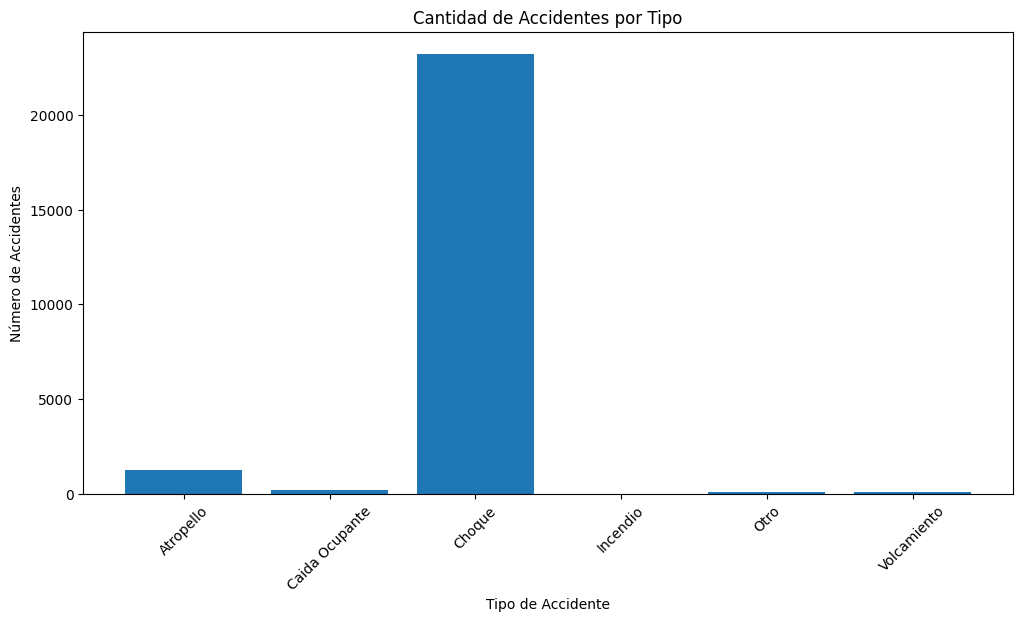

In [123]:
plt.figure(figsize=(12, 6))
plt.bar(df_group_clase_accidente ['CLASE_ACCIDENTE'], df_group_clase_accidente ['NUM_ACCIDENTES'])
plt.xlabel('Tipo de Accidente')
plt.ylabel('Número de Accidentes')
plt.title('Cantidad de Accidentes por Tipo')
plt.xticks(rotation=45)
plt.show()

### Porcentaje de accidentes por año

In [124]:
df_group_año = df.groupby(["AÑO_ACCIDENTE",'CLASE_ACCIDENTE']).size().reset_index(name='NUM_ACCIDENTES')

In [125]:
df_group_año_suma = df_group_año.groupby("AÑO_ACCIDENTE")["NUM_ACCIDENTES"].sum().reset_index(name='TOTAL_ACCIDENTES_POR_AÑO')

In [126]:
total_accidentes = df_group_año_suma['TOTAL_ACCIDENTES_POR_AÑO'].sum()

In [127]:
df_group_año_suma['PORCENTAJE'] = round((df_group_año_suma['TOTAL_ACCIDENTES_POR_AÑO'] / total_accidentes) * 100,2)


In [128]:
df_group_año_suma

,AÑO_ACCIDENTE,TOTAL_ACCIDENTES_POR_AÑO,PORCENTAJE
0,2018,5898,23.72
1,2019,5645,22.70
2,2020,3281,13.19
3,2021,4700,18.90
4,2022,3683,14.81
5,2023,1662,6.68


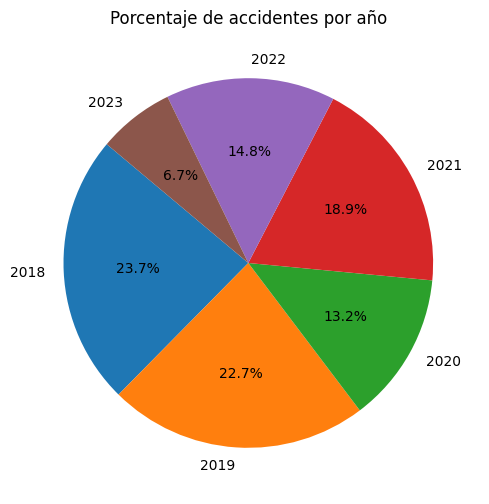

In [129]:
plt.figure(figsize=(8,6))
plt.pie(df_group_año_suma['PORCENTAJE'], labels=df_group_año_suma['AÑO_ACCIDENTE'], autopct='%1.1f%%', startangle=140)
plt.title("Porcentaje de accidentes por año")
plt.show()

### Cantidad de accidentes segun el tipo de accidentes por cada año

In [130]:
df_group_año

,AÑO_ACCIDENTE,CLASE_ACCIDENTE,NUM_ACCIDENTES
0,2018,Atropello,284
1,2018,Caida Ocupante,30
2,2018,Choque,5539
3,2018,Incendio,4
4,2018,Otro,20
5,2018,Volcamiento,21
6,2019,Atropello,229
7,2019,Caida Ocupante,30
8,2019,Choque,5343
9,2019,Incendio,3


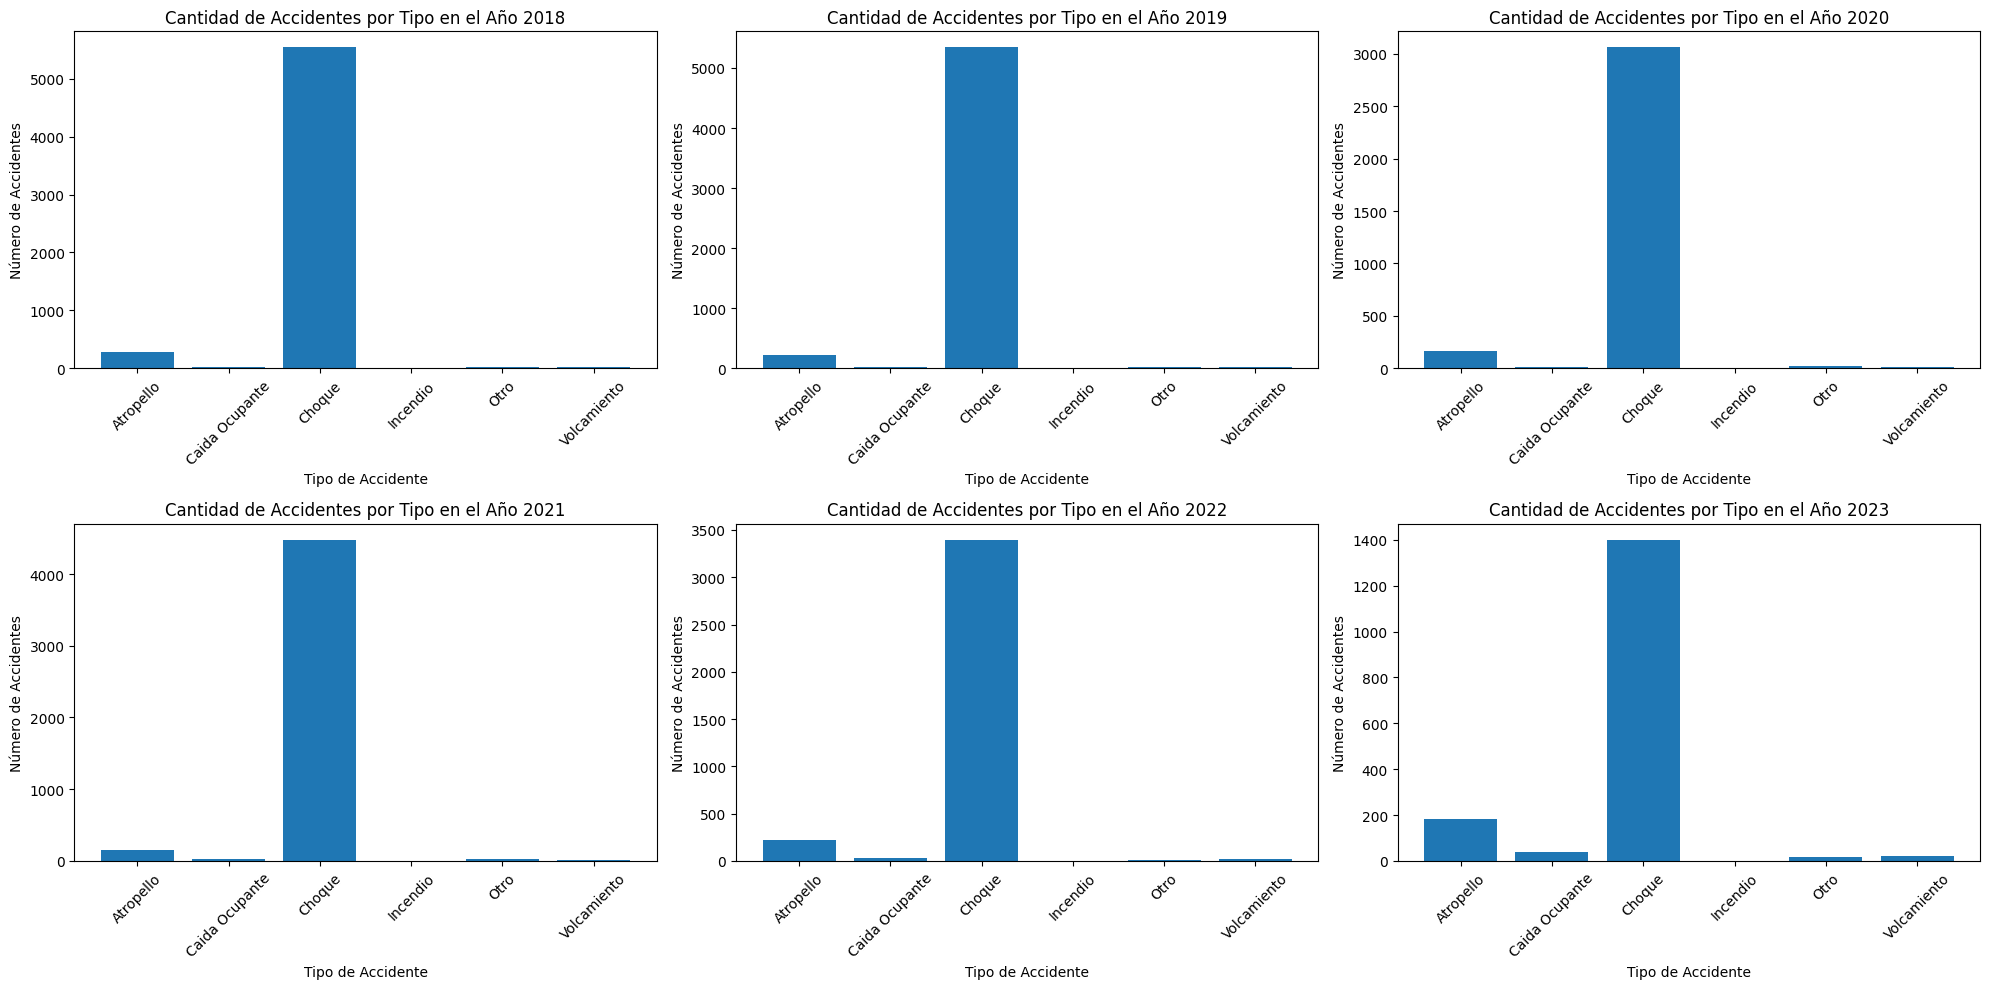

In [131]:
años = df_group_año['AÑO_ACCIDENTE'].unique()

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i, año in enumerate(años):
    data_año = df_group_año[df_group_año['AÑO_ACCIDENTE'] == año]
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    ax.bar(data_año['CLASE_ACCIDENTE'], data_año['NUM_ACCIDENTES'])
    ax.set_xlabel('Tipo de Accidente')
    ax.set_ylabel('Número de Accidentes')
    ax.set_title(f'Cantidad de Accidentes por Tipo en el Año {año}')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Cantidad de accidentes segun la gravedad

In [132]:
df_group_gravedad = df.groupby(['CLASE_ACCIDENTE',"GRAVEDAD_ACCIDENTE"]).size().reset_index(name='NUM_ACCIDENTES')

In [133]:
df_group_gravedad

,CLASE_ACCIDENTE,GRAVEDAD_ACCIDENTE,NUM_ACCIDENTES
0,Atropello,Con heridos,1160
1,Atropello,Con muertos,76
2,Caida Ocupante,Con heridos,176
3,Caida Ocupante,Con muertos,5
4,Choque,Con heridos,7687
5,Choque,Con muertos,144
6,Choque,Solo daños,15383
7,Incendio,Con heridos,1
8,Incendio,Solo daños,12
9,Otro,Con heridos,80


In [134]:
accidentes_con_heridos = df_group_gravedad[df_group_gravedad['GRAVEDAD_ACCIDENTE'] == 'Con heridos']['NUM_ACCIDENTES'].sum()

accidentes_con_muertos = df_group_gravedad[df_group_gravedad['GRAVEDAD_ACCIDENTE'] == 'Con muertos']['NUM_ACCIDENTES'].sum()

accidentes_solo_daños = df_group_gravedad[df_group_gravedad['GRAVEDAD_ACCIDENTE'] == 'Solo daños']['NUM_ACCIDENTES'].sum()

In [135]:
df_accidentes_gravedad = pd.DataFrame({
    'GRAVEDAD_ACCIDENTE': ['Con heridos', 'Con muertos', 'Solo daños'],
    'TOTAL_ACCIDENTES': [accidentes_con_heridos, accidentes_con_muertos, accidentes_solo_daños]
})

In [136]:
total_accidentes = df_accidentes_gravedad['TOTAL_ACCIDENTES'].sum()
df_accidentes_gravedad['PORCENTAJE'] = (df_accidentes_gravedad['TOTAL_ACCIDENTES'] / total_accidentes) * 100

In [137]:
df_accidentes_gravedad

,GRAVEDAD_ACCIDENTE,TOTAL_ACCIDENTES,PORCENTAJE
0,Con heridos,9179,36.909405
1,Con muertos,235,0.944952
2,Solo daños,15455,62.145643


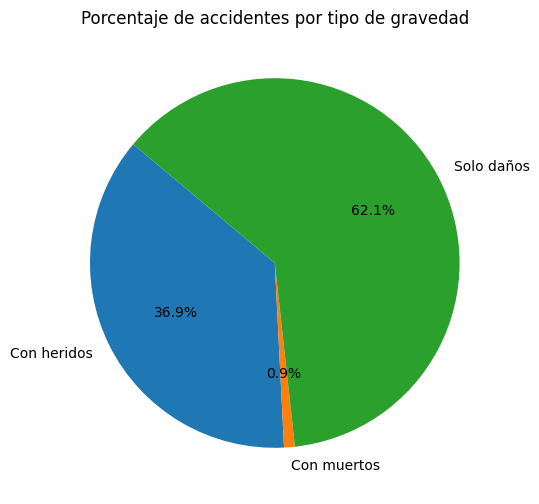

In [138]:
plt.figure(figsize=(8, 6))
plt.pie(df_accidentes_gravedad['PORCENTAJE'], labels=df_accidentes_gravedad['GRAVEDAD_ACCIDENTE'], autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de accidentes por tipo de gravedad')
plt.show()

<Figure size 1200x800 with 0 Axes>

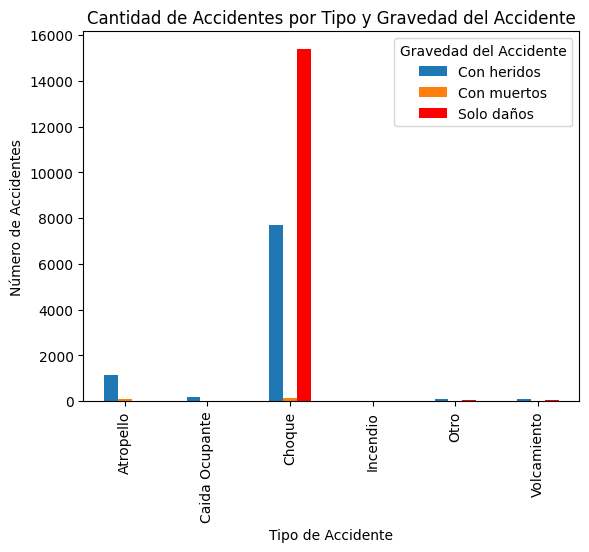

In [139]:
plt.figure(figsize=(12, 8))
colors = ['#1f77b4', '#ff7f0e', 'red']
df_pivot = df_group_gravedad.pivot(index='CLASE_ACCIDENTE', columns='GRAVEDAD_ACCIDENTE', values='NUM_ACCIDENTES')
df_pivot.plot(kind='bar', color=colors)
plt.xlabel('Tipo de Accidente')
plt.ylabel('Número de Accidentes')
plt.title('Cantidad de Accidentes por Tipo y Gravedad del Accidente')
plt.legend(title='Gravedad del Accidente')

plt.show()

In [140]:
df_group_año = df.groupby(['AÑO_ACCIDENTE', 'CLASE_ACCIDENTE']).size().reset_index(name='NUM_ACCIDENTES')

In [141]:
df_group_año

,AÑO_ACCIDENTE,CLASE_ACCIDENTE,NUM_ACCIDENTES
0,2018,Atropello,284
1,2018,Caida Ocupante,30
2,2018,Choque,5539
3,2018,Incendio,4
4,2018,Otro,20
5,2018,Volcamiento,21
6,2019,Atropello,229
7,2019,Caida Ocupante,30
8,2019,Choque,5343
9,2019,Incendio,3


### Promedio de accientes por dia

In [142]:
accidentes_dia = df.groupby(["AÑO_ACCIDENTE","DIA_ACCIDENTE"]).size()

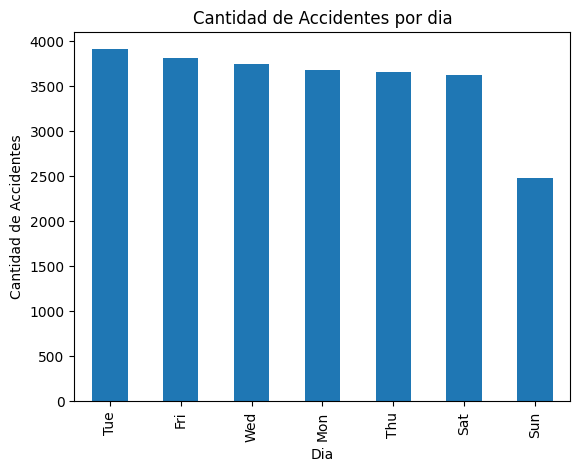

In [143]:
df['DIA_ACCIDENTE'].value_counts().plot(kind='bar')
plt.title('Cantidad de Accidentes por dia')
plt.xlabel('Dia')
plt.ylabel('Cantidad de Accidentes')
plt.show()

### Promedio de accidentes por mes

In [144]:
accidentes_por_mes = df.groupby(['AÑO_ACCIDENTE', 'MES_ACCIDENTE']).size()

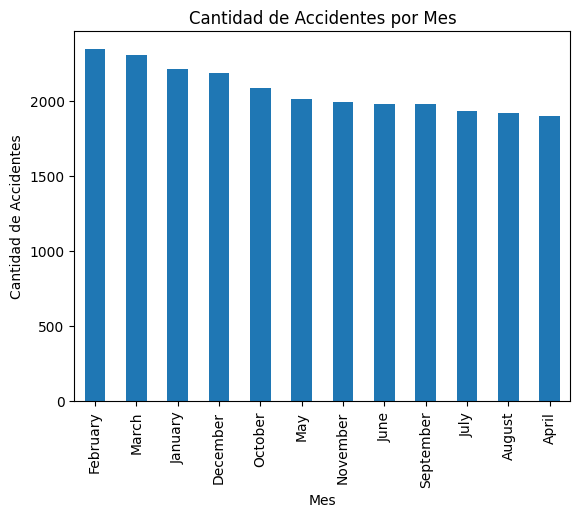

In [145]:
df['MES_ACCIDENTE'].value_counts().plot(kind='bar')
plt.title('Cantidad de Accidentes por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Accidentes')
plt.show()

### Promedio de accidentes por año

In [146]:
promedio_anual = df_group_año.groupby('AÑO_ACCIDENTE')['NUM_ACCIDENTES'].mean().reset_index()

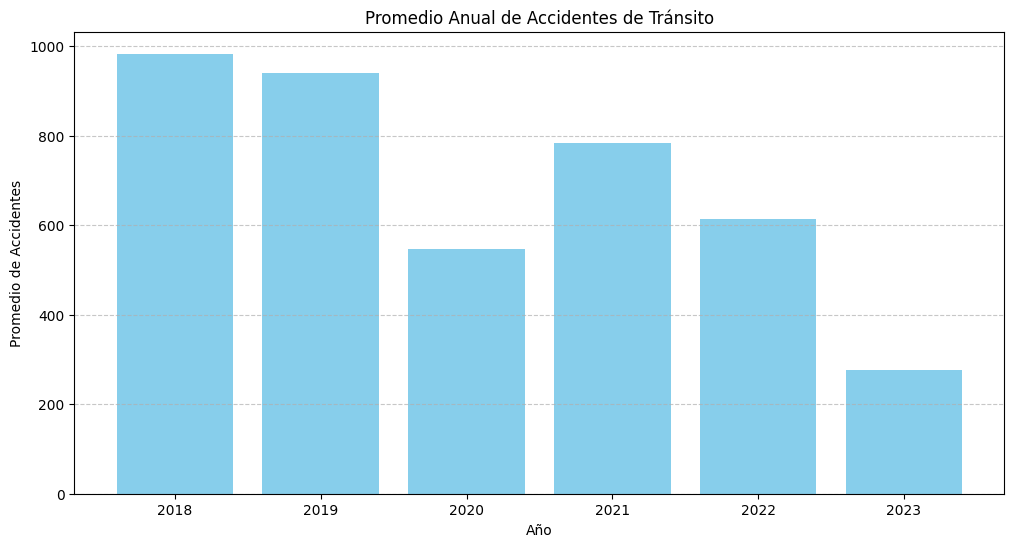

In [147]:
plt.figure(figsize=(12, 6))
plt.bar(promedio_anual['AÑO_ACCIDENTE'], promedio_anual['NUM_ACCIDENTES'], color='skyblue')
plt.xlabel('Año')
plt.ylabel('Promedio de Accidentes')
plt.title('Promedio Anual de Accidentes de Tránsito')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## Conclusiones
- Observamos que los principales accidentes en barranquilla son:
    * Choque con el 93.3%
    * Atropello con 4.9%
- Observamos que los años con mayor indice de accidentes en el 2018 y 2019
    * 2018 con el 23.7%
    * 2019 con el 22.7%
- Observamos que la mayor parte de accidentes de transito solo conlleva daños
    * Daños con el 62.1%
- Observamos que los meses con mayor accidentalidad son los meses de Febrero y Marzo, los cuales son los meses en los que se presentan las fiestas de carnavales en Barranquilla.
- Observamos que la mayor cantidad de accidentes se presentan los dias Martes